<a href="https://colab.research.google.com/github/FadouaKhm/CSE-590---Spring-2021---Intro-to-ML-and-DL-Tutorials/blob/main/k_fold_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is K-Fold Cross Validation?
K-Fold CV is where a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point. 

Lets take the scenario of 5-Fold cross validation(K=5). Here, the data set is split into 5 folds. In the first iteration, the first fold is used to test the model and the rest are used to train the model. In the second iteration, 2nd fold is used as the testing set while the rest serve as the training set. This process is repeated until each fold of the 5 folds have been used as the testing set.
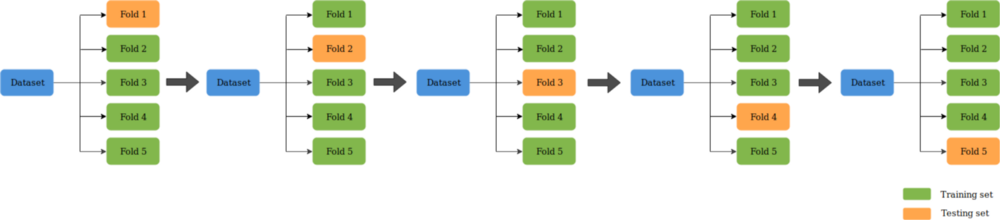

## Evaluating a ML model using K-Fold CV
Lets evaluate a simple classification model using K-Fold CV. In this example, we will be performing 10-Fold cross validation using Logistic Regression on IRIS data.

In [ ]:
# Load necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np

In [ ]:
# Load data and separate features and labels
iris_dataset = load_iris()
X = iris_dataset['data']
y = iris_dataset['target']

In [ ]:
X.shape

(150, 4)

In [ ]:
# K-fold CV
scores = []
LR = LogisticRegression()
cv = KFold(n_splits=10, random_state=42, shuffle=False)
i = 1
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    LR.fit(X_train, y_train)
    scores.append(LR.score(X_test, y_test))
    print('Processing Fold #', i)
    print("  - Train partition shape: ", X_train.shape)
    print("  - Test partition shape: ", X_test.shape)
    print("  - Training score = ", LR.score(X_train, y_train))
    print("  - Testing score = ", LR.score(X_test, y_test))

    i += 1

Processing Fold # 1
  - Train partition shape:  (135, 4)
  - Test partition shape:  (15, 4)
  - Training score =  0.9629629629629629
  - Testing score =  1.0
Processing Fold # 2
  - Train partition shape:  (135, 4)
  - Test partition shape:  (15, 4)
  - Training score =  0.9629629629629629
  - Testing score =  1.0
Processing Fold # 3
  - Train partition shape:  (135, 4)
  - Test partition shape:  (15, 4)
  - Training score =  0.9629629629629629
  - Testing score =  1.0
Processing Fold # 4
  - Train partition shape:  (135, 4)
  - Test partition shape:  (15, 4)
  - Training score =  0.9481481481481482
  - Testing score =  0.8666666666666667
Processing Fold # 5
  - Train partition shape:  (135, 4)
  - Test partition shape:  (15, 4)
  - Training score =  0.9407407407407408
  - Testing score =  0.7333333333333333
Processing Fold # 6
  - Train partition shape:  (135, 4)
  - Test partition shape:  (15, 4)
  - Training score =  0.9481481481481482
  - Testing score =  0.6666666666666666
Process

In [ ]:
# Print average testing score over all CV folds
print(np.mean(scores))

0.8799999999999999


### Option #2
Use [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and [cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)

In [ ]:
# Option #2 
from sklearn.model_selection import cross_val_score,cross_val_predict
cross_val_score(LR, X, y, cv=10)


array([1.        , 1.        , 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.8       , 0.93333333, 1.        , 1.        ])

In [ ]:
cross_val_predict(LR, X, y, cv=10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Hyperparameters tuning using CV and Grid Search

In [ ]:
# Get param names
LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Define hyperparameters and their search range
C_vals = np.logspace(0,4,10)
hyperparameters = dict(C=C_vals)

In [ ]:
# Find best parameters using grid search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(LR, hyperparameters, cv=5)
#Fit model
clf.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
print(clf.best_params_)

{'C': 166.81005372000593}
